
# check in part 1


<h3>all the check ins are on the same file, marked with a heading where they each start</h3>

In [1]:
import json
import pandas as pd

In [4]:
with open (r"/Users/kaylashrieve/Documents/fortnite.json") as f:
    act = json.load(f) 

In [5]:
data = pd.read_json(r"/Users/kaylashrieve/Documents/fortnite.json") 

In [6]:
print(data)

   Time of Day  Placed  Eliminations  Assists  Revives Accuracy  Hits  \
0      6:00 PM      27             2        0        0      23%    14   
1      6:00 PM      45             1        2        0      30%    19   
2      6:00 PM      38             3        0        0      30%    32   
3      7:00 PM      30             1        3        0      18%    19   
4      7:00 PM      16             3        1        1      58%    42   
..         ...     ...           ...      ...      ...      ...   ...   
82    12:00 AM       2             8        2        0      31%    97   
83    12:00 AM      24             4        0        0      20%    12   
84     1:00 PM      30             1        2        0      28%    40   
85     2:00 PM      18             3        2        1      26%    25   
86     2:00 PM      39             1        0        0      31%    12   

    Head Shots  Distance Traveled  Materials Gathered  Materials Used  \
0            2             271.08                 

I've been manually recording the Match Stats given from 87 Fortnite games (to be 100 of my personal games) and keeping them in an excel spreadsheet. I then converted that spreadsheet into JSON format, loaded in my data, and then converted it into a data frame to make it easier to read. 

I have given two friends the exact same spreadsheet format and am having them also play 100 games of Fortnite each, and they are sending me the data by April 30th. I will have 300 total games of Fortnite to work off of, to figure out if you have to build to make it into the top 25 of the match, or arbitraily "be good" at the game. 

check in part 2 

In [5]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from scipy import stats
import pandas as pd
import json

In [6]:
with open (r"/Users/kaylashrieve/Documents/fortnite.json") as f:
    act = json.load(f) 

In [7]:
data = pd.read_json(r"/Users/kaylashrieve/Documents/fortnite.json") 

In [8]:
print(data)

   Time of Day  Placed  Eliminations  Assists  Revives Accuracy  Hits  \
0      6:00 PM      27             2        0        0      23%    14   
1      6:00 PM      45             1        2        0      30%    19   
2      6:00 PM      38             3        0        0      30%    32   
3      7:00 PM      30             1        3        0      18%    19   
4      7:00 PM      16             3        1        1      58%    42   
..         ...     ...           ...      ...      ...      ...   ...   
82    12:00 AM       2             8        2        0      31%    97   
83    12:00 AM      24             4        0        0      20%    12   
84     1:00 PM      30             1        2        0      28%    40   
85     2:00 PM      18             3        2        1      26%    25   
86     2:00 PM      39             1        0        0      31%    12   

    Head Shots  Distance Traveled  Materials Gathered  Materials Used  \
0            2             271.08                 

# CHECK IN PART 2 STARTS HERE!!

In [31]:
data = pd.read_json(r"/Users/kaylashrieve/Documents/fortnite.json")
data.head()

,Time of Day,Placed,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,6:00 PM,27,2,0,0,23%,14,2,271.08,20,20,272,331,621
1,6:00 PM,45,1,2,0,30%,19,1,396.73,123,30,247,444,998
2,6:00 PM,38,3,0,0,30%,32,1,607.80,71,60,176,322,1109
3,7:00 PM,30,1,3,0,18%,19,1,714.16,244,10,238,330,4726
4,7:00 PM,16,3,1,1,58%,42,18,1140.00,584,150,365,668,2070


In [32]:
summary = data["Placed"].describe()

In [33]:
print(summary)

count    87.000000
mean     22.045977
std      13.145791
min       1.000000
25%      15.000000
50%      21.000000
75%      28.500000
max      66.000000
Name: Placed, dtype: float64


In [34]:
summary2 = data["Materials Gathered"].describe()

In [35]:
print(summary2)

count      87.000000
mean      386.574713
std       569.978062
min         0.000000
25%        75.000000
50%       164.000000
75%       418.500000
max      3002.000000
Name: Materials Gathered, dtype: float64


In [36]:
summary3 = data["Materials Used"].describe()

In [37]:
print(summary3)

count      87.000000
mean      122.712644
std       225.170370
min         0.000000
25%        20.000000
50%        50.000000
75%       145.000000
max      1740.000000
Name: Materials Used, dtype: float64


In [38]:
correlate = data.corr()

In [39]:
print(correlate)

                        Placed  Eliminations   Assists   Revives      Hits  \
Placed                1.000000     -0.620700 -0.379723 -0.308495 -0.443354   
Eliminations         -0.620700      1.000000  0.094521  0.266319  0.665995   
Assists              -0.379723      0.094521  1.000000  0.239323  0.211216   
Revives              -0.308495      0.266319  0.239323  1.000000  0.238168   
Hits                 -0.443354      0.665995  0.211216  0.238168  1.000000   
Head Shots           -0.316161      0.363349  0.157487  0.176711  0.669589   
Distance Traveled    -0.770639      0.698474  0.421262  0.177137  0.403652   
Materials Gathered   -0.569598      0.705802  0.186226  0.118319  0.397026   
Materials Used       -0.529942      0.635065  0.128232  0.180731  0.249932   
Damage Taken         -0.443081      0.369043  0.248184  0.037167  0.456642   
Damage to Players    -0.608608      0.853151  0.265802  0.319366  0.788184   
Damage to Structures -0.579788      0.611652  0.195581  0.136580

In [40]:
import matplotlib.pyplot as plt
import numpy as np

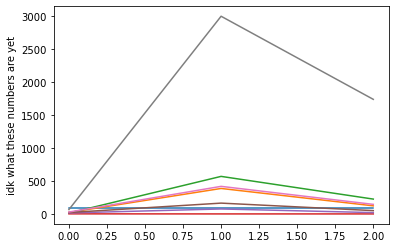

In [41]:
plt.plot([summary, summary2, summary3])
plt.ylabel('idk what these numbers are yet')
plt.show()

In [45]:
 avgplace = data["Placed"].mean()

In [46]:
print(avgplace)

22.04597701149425


In [48]:
 avggather = data["Materials Gathered"].mean()

In [49]:
print(avggather)

386.57471264367814


In [50]:
 avguse = data["Materials Used"].mean()

In [51]:
print(avguse)

122.71264367816092


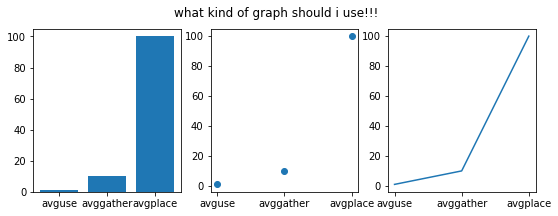

In [58]:
names = ['avguse', 'avggather', 'avgplace']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('what kind of graph should i use!!!')
plt.show()

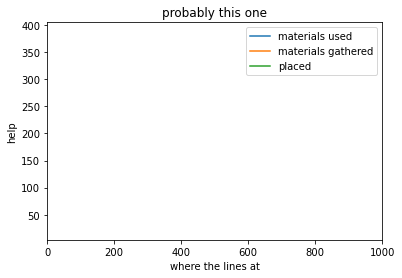

In [86]:
x = np.linspace(0, 2, 600)

plt.plot(avguse, label='materials used')
plt.plot(avggather, label='materials gathered')
plt.plot(avgplace, label='placed')
plt.xlim(0,1000)
plt.xlabel('where the lines at')
plt.ylabel('help')
plt.title("probably this one")
plt.legend()

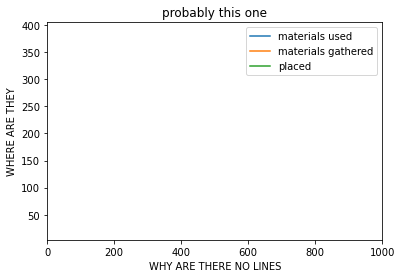

In [87]:
x = np.linspace(0, 2, 600)

plt.plot(22.04597701149425, label='materials used')  
plt.plot(386.57471264367814, label='materials gathered')  
plt.plot(122.71264367816092, label='placed')
plt.xlim(0,1000)
plt.xlabel('WHY ARE THERE NO LINES')
plt.ylabel('WHERE ARE THEY')
plt.title("probably this one")
plt.legend()

ok all of this was literally just seeing what was useful now i'm on to like actually doing things for the end of it (i work very unorganized) 

i'm gonna pull anything <25 from "placed" and then from those the "materials gathered" and materials used" then pull the data from the rest of them >25 and see what happens, i don't know how to do that though actually 

i also wanna use seaborne histograms but i dont think i understand how it works, i was putting in the correct variables and watching tutorials pretty much straight from their site but they kept giving me traceback errors 

and then on the last one I CANNOT GET THE LINES TO WORK i am following a guide straight from matplotlib and i do not know where my lines are 
